In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load Dataset

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
print(df.head())
print(df['target'].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Train/Test Split & Standardization

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target',axis=1)
y = df['target']

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

# Standardize Features
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Fit Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Evaluate Model

Confusion Matrix:
 [[41  1]
 [ 1 71]]
Precision: 0.9861111111111112
Recall: 0.9861111111111112
ROC-AUC: 0.9953703703703703


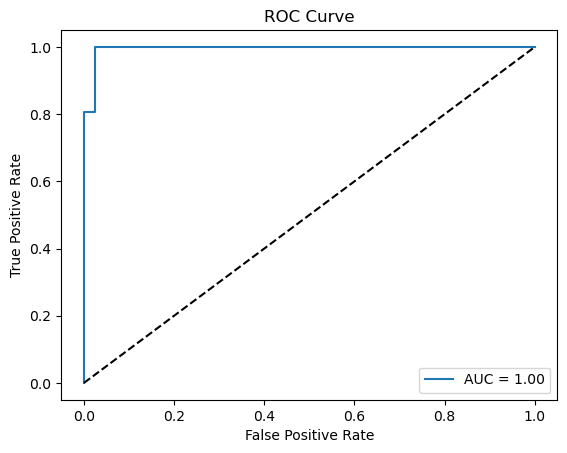

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = log_reg.predict(X_test)

# Metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Tuning Threshold

In [11]:
# Predict probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Set custom threshold
threshold = 0.4
y_pred_custom = (y_pred_proba >= threshold).astype(int)

# Evaluate
print("Confusion Matrix (Threshold=0.4):\n", confusion_matrix(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))


Confusion Matrix (Threshold=0.4):
 [[41  1]
 [ 1 71]]
Precision: 0.9861111111111112
Recall: 0.9861111111111112


# Sigmoid Function Explanation

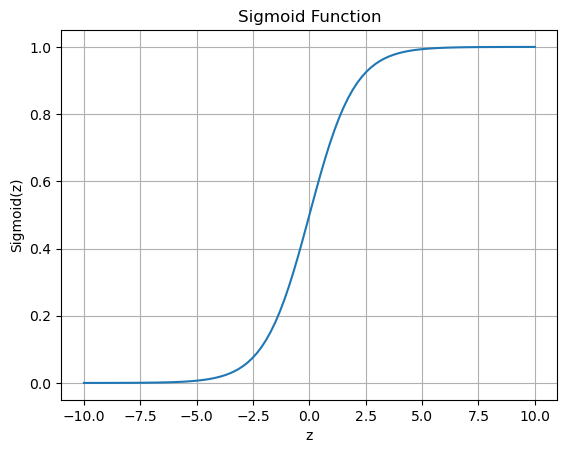

In [12]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid
z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()
